### Find number of Hessians and Gradients

In [14]:
import pandas as pd
df = pd.read_csv("Parameter_List_Adjoint_tutorial_Set_2.csv")
#checking the number of empty rows in th csv file
print (df.isnull().sum())
#Droping the empty rows
modifiedDF = df.dropna()
#Saving it to the csv file 
modifiedDF.to_csv('Parameter_List_Adjoint_tutorial_Set_2_new.csv',index=False)

Parameter Set No.                       17
Iteration Limit                         17
Initial Radius                          17
Radius Growing Rate                     17
Radius Shrinking Rate (Negative rho)    17
Radius Shrinking Rate (Positive rho)    17
Radius Shrinking Threshold              17
Radius Growing Threshold                17
dtype: int64


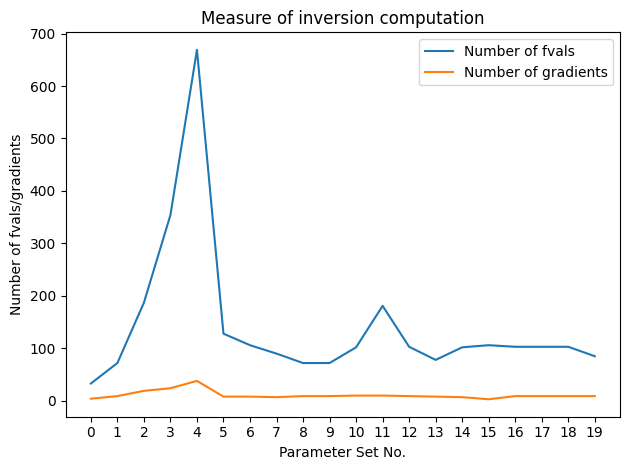

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
  
parameter_file = 'Parameter_List_Adjoint_tutorial.csv'
in_filename = 'output_new.csv'
out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line:
            out.write(line)

iteration_limits = []
with open(parameter_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
        else:
            iteration_limits.append(int(row[1]))

index = np.zeros(len(iteration_limits))
fvals = []
gradients = []
for j in range(len(iteration_limits)):
    if j==0:
        index[j] = iteration_limits[j] + 3
    else:
        index[j] = index[j-1] + iteration_limits[j] + 4

with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        line_count= line_count+1
        flag = 0
        for k in range(len(index)):
            if line_count == index[k]:
                flag = 1
        if flag==1:
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        gradients.append(float(t))
                    elif column == 6:
                        fvals.append(float(t))
                except ValueError:
                    pass
# print(f'Gradients: {gradients} \n Hessians: {hessians}')


# Plot
x = np.arange(0,len(iteration_limits),1)
plt.plot(x, hessians, label='Number of fvals')
plt.plot(x, gradients, label='Number of gradients')
plt.xlabel("Parameter Set No.")
plt.ylabel("Number of fvals/gradients")
plt.xticks(range(0,len(iteration_limits)))
# plt.yscale("log")
# plt.ylim(7e-6,1e-5)
plt.legend()
plt.title("Measure of inversion computation")
plt.tight_layout()

In [11]:
print(f'gradients: {gradients} \n fvals: {fvals}')

gradients: [4.0, 9.0, 19.0, 24.0, 38.0, 8.0, 8.0, 7.0, 9.0, 9.0, 10.0, 10.0, 9.0, 8.0, 7.0, 3.0, 9.0, 9.0, 9.0, 9.0] 
 fvals: [6.0, 11.0, 21.0, 31.0, 51.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0]
